In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('15_9-19.csv',header=0,skiprows=[1])
df.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


In [31]:
df.shape

(4101, 18)

Looks Like there are 18 columns, each representing a specific well-logging technique...also there are 4102 rows, the first row representing the units. Hence 4101 rows are there.

Let us print all the columns (i.e. the well-logging techniques)...

In [32]:
df.columns

Index(['DEPTH', 'CALI', 'COAL', 'DT', 'DT_LOG', 'DTS', 'DTS_LOG', 'GR', 'NPHI',
       'PHIE', 'PHIEC', 'PHIT', 'PHITC', 'RHOB', 'RHOB_LOG', 'RT', 'RW',
       'TEMP'],
      dtype='object')

In [33]:
df.isnull().sum()

DEPTH        0
CALI         0
COAL         0
DT           0
DT_LOG       0
DTS          0
DTS_LOG      0
GR          33
NPHI         1
PHIE         0
PHIEC        0
PHIT         0
PHITC        0
RHOB         0
RHOB_LOG     0
RT           0
RW           0
TEMP         0
dtype: int64

So there are 33 null values on the Gamma-ray column and 1 null-value on the NPHI (Neutron porosity) column...

In [36]:
df.NPHI.unique()

array([ 1.542e-01,  1.694e-01,  1.776e-01, ...,  1.919e-01,  1.922e-01,
       -9.990e+02])

In [37]:
# Checking the datatypes of all the columns

df.dtypes

DEPTH       float64
CALI        float64
COAL          int64
DT          float64
DT_LOG      float64
DTS         float64
DTS_LOG     float64
GR          float64
NPHI        float64
PHIE        float64
PHIEC       float64
PHIT        float64
PHITC       float64
RHOB        float64
RHOB_LOG    float64
RT          float64
RW          float64
TEMP        float64
dtype: object

As we can see, there's an unusual value of -999.0 in the NPHI column...

Let us print the dataframe for all the rows having NPHI = -999

In [38]:
df[df.NPHI==-999]

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
3905,4095.1403,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3906,4095.2927,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3907,4095.4451,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3908,4095.5975,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3909,4095.7499,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,4124.2487,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4097,4124.4011,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4098,4124.5535,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4099,4124.7059,-999.0,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


As we can see, not only NPHI but all the rows having the same -999 value. Hence, it can be easily assumed that these are
garbedge values. There are 196 rows of garbedge value out of 4101 rows.

In [40]:
df[df.NPHI == np.nan]

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP


Let us replace the -999 values with np.nan values

In [44]:
df.replace(-999,np.nan,inplace=True)
df.isnull().sum()

DEPTH         0
CALI        196
COAL        196
DT          196
DT_LOG      196
DTS         196
DTS_LOG     196
GR          284
NPHI        197
PHIE        259
PHIEC       259
PHIT        259
PHITC       259
RHOB        199
RHOB_LOG    198
RT          196
RW          259
TEMP        196
dtype: int64

Text(0.5, 0, 'GR-log')

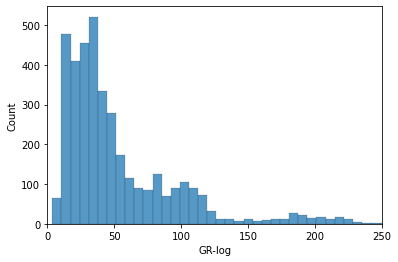

In [54]:
sns.histplot(data= df,bins=230,x="GR")
plt.xlim(0,250)
plt.xlabel('GR-log')

# Shale Volumne Function (Vsh)

In [64]:
def v_shale(gamma_ray,gamma_ray_max,gamma_ray_min):
    v_sh = (gamma_ray - gamma_ray_min)/(gamma_ray_max - gamma_ray_min)
    return round(v_sh,4)

In [65]:
v_shale(10,15,5)   # to check if it is working fine or not

0.5

# Density Porosity Function (DPHI)

In [62]:
def density_porosity(log_density,matrix_density,fluid_density):
    d_phi = (matrix_density - log_density)/(matrix_density - fluid_density)
    return round(d_phi,4)

In [63]:
density_porosity(25.337,31.56879,20.3943)

0.5577